# 간단한 랜덤 함수

In [295]:
import numpy as np
from numpy import random

## 랜덤 정수

In [296]:
random.randint(5, size=(2,5))

array([[2, 2, 3, 4, 0],
       [3, 4, 3, 0, 1]])

## 랜덤 실수

In [297]:
random.random((2,5))
# random.random_sample((2,5))

array([[0.88135103, 0.21725565, 0.0793051 , 0.27524196, 0.29998887],
       [0.35166449, 0.87767733, 0.91344238, 0.44988082, 0.04537905]])

In [298]:
random.rand(2,5)

array([[0.4172141 , 0.68724517, 0.07583574, 0.631714  , 0.60954456],
       [0.33898822, 0.66449803, 0.61905168, 0.03084568, 0.1756721 ]])

## 랜덤 선택

In [299]:
random.choice(np.arange(10))

2

In [300]:
random.choice(np.arange(10), size = (2,5))

array([[0, 1, 6, 4, 5],
       [4, 3, 3, 2, 4]])

In [301]:
a = np.arange(10).reshape(5,2)
random.shuffle(a)
a

array([[2, 3],
       [4, 5],
       [8, 9],
       [6, 7],
       [0, 1]])

In [302]:
a = np.arange(10).reshape(5,2)
random.permutation(a)

array([[0, 1],
       [6, 7],
       [2, 3],
       [8, 9],
       [4, 5]])

<br>

<br>

# 랜덤은 언제나 랜덤인가?

컴퓨터는 0아니면 1로 만들어져 있으므로 사실상 '진짜' 랜덤은 있을 수 없다.


그러므로 랜덤 알고리즘의 인수를 지정하면 언제나 같은 랜덤 결과를 얻을 수 있다.


이것을 pseudo 랜덤이라고 한다.

## seed 지정안함

In [303]:
def print_random():
    print(random.rand(3))

In [304]:
for i in range(3):
    print_random()

[0.99275475 0.59895653 0.28299259]
[0.31530881 0.03377133 0.56796913]
[0.20969589 0.84687841 0.8963271 ]


## seed 지정함

In [305]:
def print_random_fixed():
    random.seed(42)
    print(random.rand(3))

In [306]:
for i in range(3):
    print_random_fixed()

[0.37454012 0.95071431 0.73199394]
[0.37454012 0.95071431 0.73199394]
[0.37454012 0.95071431 0.73199394]


## 동전 던지기 실험

시행: 동전을 4회 던지는 것

시행 횟수: 10000회

성공 조건: 한 시행의 결과가 모두 앞면

<br>
<br>


상식적으로는 위 실험의 결과가 매번 달라져야하겠지만,

seed를 지정했기 때문에 언제나 0.0618이 나올 것이다.

seed를 42가 아닌 다른 값을 넣으면 또 다른 결과로 고정된다.

In [307]:
random.seed(42)

n_all_heads = 0

# Initialize number of 4-heads trials
for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

n_all_heads / 10000

0.0618

## 히스토그램으로 보기

In [308]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [309]:
def show_hist(seed = None):
    np.random.seed(seed)
    random_numbers = random.rand(100)
    hist = plt.hist(random_numbers, edgecolor='black')
    plt.show()

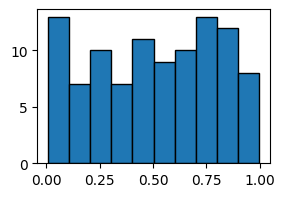

In [310]:
plt.figure(figsize=(3,2))
show_hist()

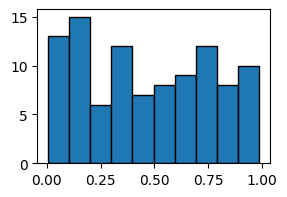

In [311]:
plt.figure(figsize=(3,2))
show_hist(42)

<br>

<br>

# 분포 그려보기

## 균일 분포

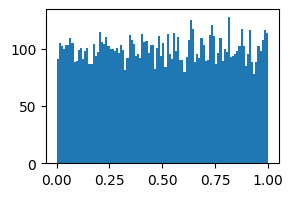

In [324]:
x = np.random.rand(10000)
# x = np.random.random(10000)

plt.figure(figsize=(3,2))
plt.hist(x, bins = 100)
plt.show()

## 정규 분포

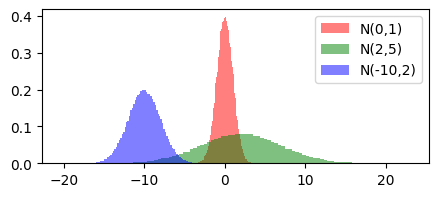

In [325]:
r = np.random.randn(100000)
# r = np.random.normal(0, 1, 100000)

g = 5 * np.random.randn(100000) + 2
# g = np.random.normal(2, 5, 100000)

b = 2 * np.random.randn(100000) -10
# b = np.random.normal(-10, 2, 100000)

plt.figure(figsize=(5,2))
plt.hist(r, bins=100, density=True, alpha=0.5, color='Red', histtype='stepfilled', label='N(0,1)')
plt.hist(g, bins=100, density=True, alpha=0.5, color='Green', histtype='stepfilled', label='N(2,5)')
plt.hist(b, bins=100, density=True, alpha=0.5, color='Blue', histtype='stepfilled', label='N(-10,2)')

plt.legend()
plt.show()

## 이항 분포

## 포아송 분포